# PLot the posterior distribution of the vKdV inputs and output for different time steps

Steps:

    - 2016-11-16
    - 2016-12-06
    - 2017-02-14
    - 2017-04-02
    

In [2]:
!ls ../../../KDV/output/*.nc

../../../KDV/output/2021-09-09--08-15-46_slim-harmo_a0_clim_rho_v4_magnus_kdv_runs.nc
../../../KDV/output/2021-09-09--08-16-36_slim-harmo_a0_data_rho_v4_magnus_kdv_runs.nc
../../../KDV/output/2021-09-09--08-17-24_slim-seasonal_a0_clim_rho_v4_magnus_kdv_runs.nc
../../../KDV/output/2021-09-09--08-18-10_slim-seasonal_a0_data_rho_v4_magnus_kdv_runs.nc


In [8]:
# vkdvfiles = {
#     'harmo_a0_data_rho':'../outputs/2021-04-08--01-30-37_slim-harmo_a0_data_rho_v3_magnus_kdv_runs.nc',
#     'harmo_a0_clim_rho':'../outputs/2021-04-08--01-29-08_slim-harmo_a0_clim_rho_v3_magnus_kdv_runs.nc',
#     'stoch_a0_clim_rho':'../outputs/2021-04-08--01-31-31_slim-stoch_a0_clim_rho_v3_magnus_kdv_runs.nc',
#     'stoch_a0_data_rho':'../outputs/2021-04-08--01-34-42_slim-stoch_a0_data_rho_v3_magnus_kdv_runs.nc',
#     'seasonal_a0_clim_rho':'../outputs/2021-05-11--12-51-40_slim-seasonal_a0_clim_rho_v3_magnus_kdv_runs.nc',
#     'seasonal_a0_data_rho':'../outputs/2021-05-11--12-50-26_slim-seasonal_a0_data_rho_v3_magnus_kdv_runs.nc',   
# }

# vkdvfiles = {
#     'harmo_a0_data_rho':'../output/2021-08-02--07-08-49_slim-harmo_a0_data_rho_v4_magnus_kdv_runs.nc',
#     'harmo_a0_clim_rho':'../output/2021-08-02--07-09-41_slim-harmo_a0_clim_rho_v4_magnus_kdv_runs.nc',
#     'seasonal_a0_clim_rho':'../output/2021-08-02--07-06-20_slim-seasonal_a0_clim_rho_v4_magnus_kdv_runs.nc',
#     'seasonal_a0_data_rho':'../output/2021-08-02--07-07-39_slim-seasonal_a0_data_rho_v4_magnus_kdv_runs.nc',   
# }

datadir = '../../../KDV/output/'
vkdvfiles = {
    'harmo_a0_data_rho':'{}/2021-09-09--08-16-36_slim-harmo_a0_data_rho_v4_magnus_kdv_runs.nc'.format(datadir),
    'harmo_a0_clim_rho':'{}/2021-09-09--08-15-46_slim-harmo_a0_clim_rho_v4_magnus_kdv_runs.nc'.format(datadir),
    'seasonal_a0_clim_rho':'{}/2021-09-09--08-17-24_slim-seasonal_a0_clim_rho_v4_magnus_kdv_runs.nc'.format(datadir),
    'seasonal_a0_data_rho':'{}/2021-09-09--08-18-10_slim-seasonal_a0_data_rho_v4_magnus_kdv_runs.nc'.format(datadir),   
}

names = ['harmo_a0_data_rho','harmo_a0_clim_rho','seasonal_a0_clim_rho','seasonal_a0_data_rho']

In [4]:
from sfoda.utils.othertime import SecondsSince

from datetime import datetime
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import h5py
import seaborn as sns

import matplotlib.dates as mdates

In [5]:
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 'medium'

In [6]:
def load_vkdv(vkdvfile):
    dskdv = xr.open_dataset(vkdvfile)
    idx = dskdv.time > np.datetime64('2030-01-01')
    ds = dskdv.isel({'time':~idx})
    return ds

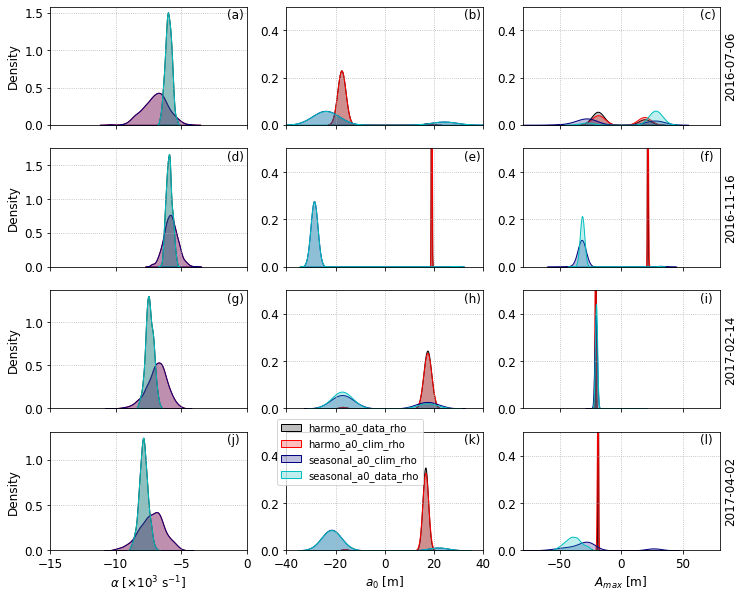

In [20]:

tsteps = ['2016-07-06','2016-11-16','2017-02-14','2017-04-02']
# tsteps = ['2016-11-16','2016-12-06','2017-02-14','2017-04-02'] # Original
colors = ['k','r','navy','c']
tt = tsteps[0]

plt.figure(figsize=(12,10))
ii=1
ax=[]
xlims = [(-15,0), (-40,40), (-80,80)]
for rr in range(4):
    for cc in range(3):
        ax.append(plt.subplot(4,3,ii))
        ax[ii-1].set_xlim(xlims[cc])
        ax[ii-1].grid(b=True, ls=':')
        if rr < 3:
            ax[ii-1].set_xticklabels([])
        
        ax[ii-1].text(0.9,0.9, '({})'.format(chr(96+ii)), transform=ax[ii-1].transAxes)
        ii+=1
        
        
        
#ax[0].plot(myds[])
for name,cc in zip(names,colors):
    dskdv = load_vkdv(vkdvfiles[name])

    for ii,tt in enumerate(tsteps):
        myds = dskdv.sel(time=np.datetime64(tt,'ns'), method='nearest')
        sns.kdeplot(myds.alpha_mu*1e3, ax=ax[0+3*ii], color=cc,shade=True, legend=False)
        sns.kdeplot(myds.a0, ax=ax[1+3*ii], color=cc,shade=True, legend=False)
        sns.kdeplot(myds.amax, ax=ax[2+3*ii], color=cc,shade=True, legend=False)


ii = 1
for rr in range(4):
    for cc in range(3):
        if cc > 0:
            ax[ii-1].set_ylabel('')
            
        if rr < 3:
            ax[ii-1].set_xlabel('')
            
        if cc == 2:
            ax[ii-1].yaxis.set_label_position("right")
            ax[ii-1].set_ylabel(tsteps[rr])
        if cc in [1,2]:
            ax[ii-1].set_ylim(0,0.5)
        ii+=1
        
ax[9].set_xlabel(r'$\alpha$ [$\times 10^3$ s$^{-1}$]')
ax[10].set_xlabel(r'$a_0$ [m]')
ax[11].set_xlabel(r'$A_{max}$ [m]')
ax[10].legend(names, fontsize=10,loc=(-0.05,0.55))

plt.savefig('../FIGURES/vkdv_posterior_examples.png',dpi=150)
plt.savefig('../FIGURES/vkdv_posterior_examples.pdf',dpi=150)